In [ ]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap


Board = torch.ones((8, 8))
# Board[1:2] = 2
# print(Board)
Board[6:7] = 0

white_pawn = {"p1":(6,0),"p2":(6,1),"p3":(6,2),"p4":(6,3),"p5":(6,4),"p6":(6,5),"p7":(6,6),"p8":(6,7)}

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2., 2., 2., 2.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])


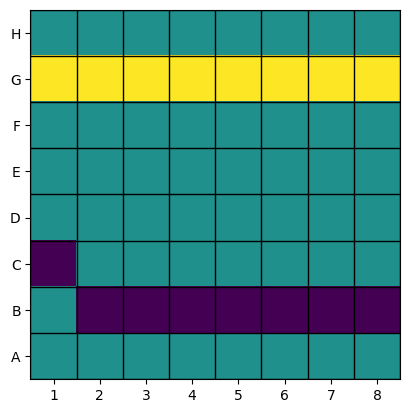

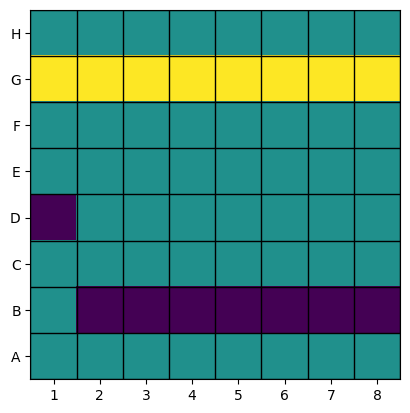

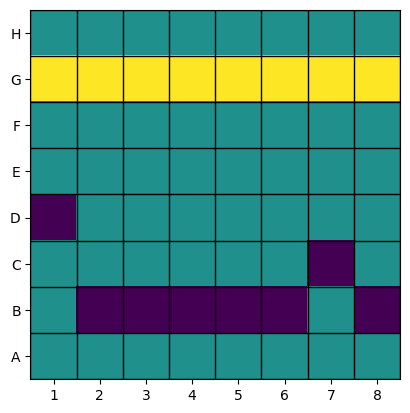

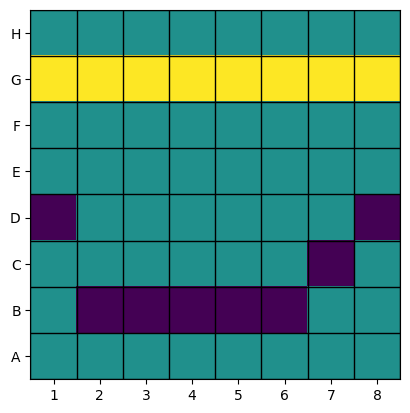

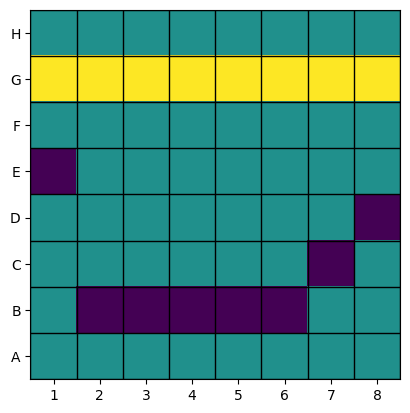

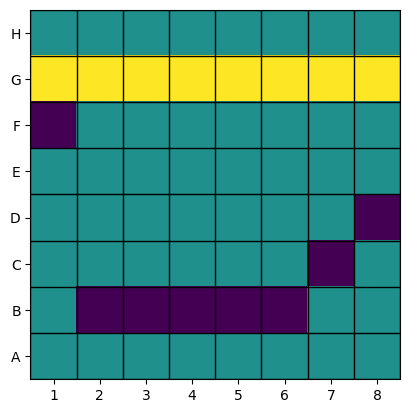

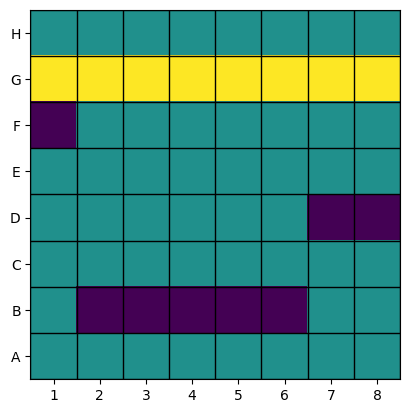

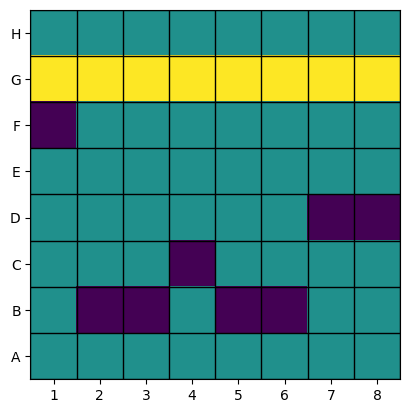

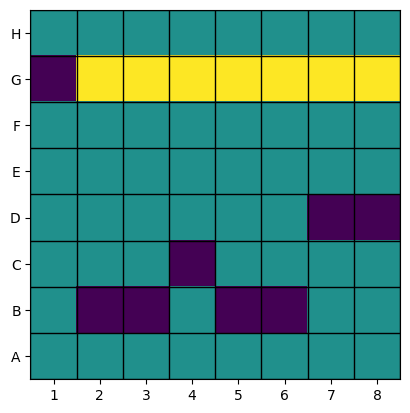

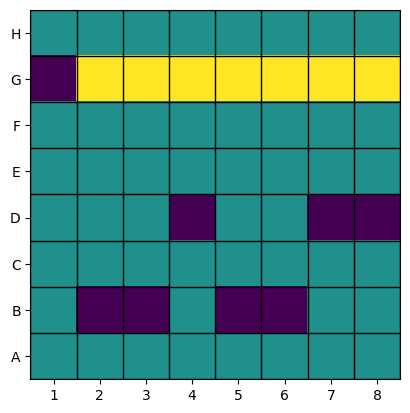

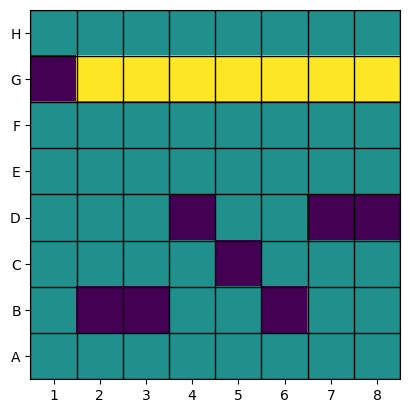

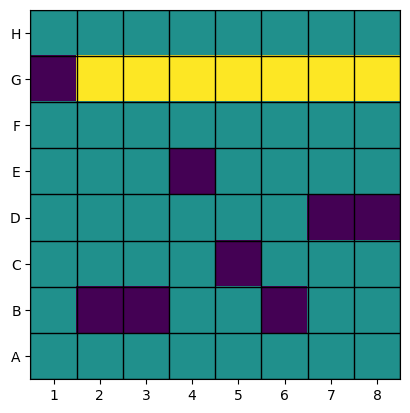

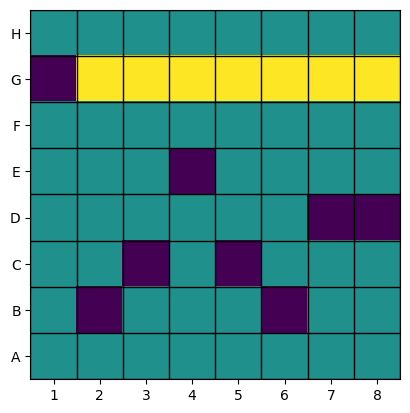

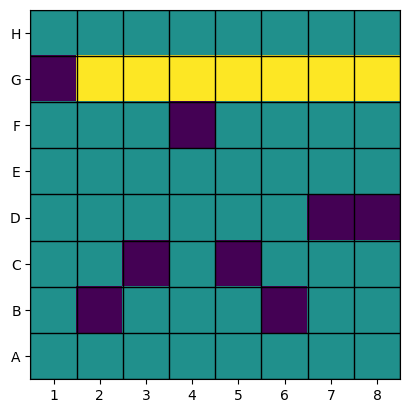

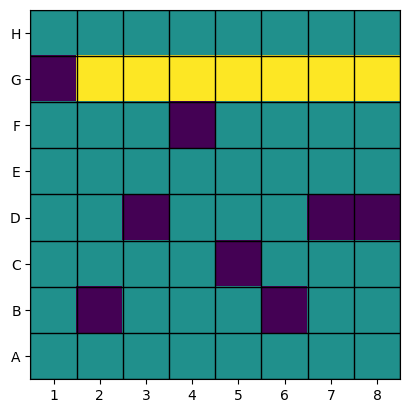

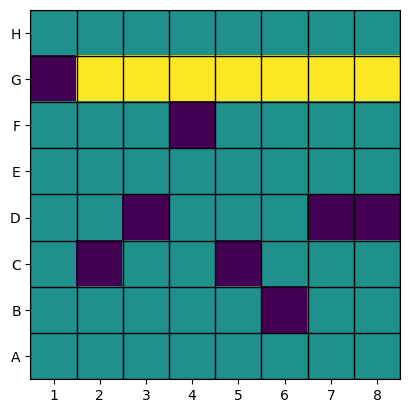

In [60]:
prev_value = {}

for i in range(16):
    random_piece = random.choice(list(white_pawn.values()))
    l = random_piece
    # print(l)

    tup1 = (1, 0)
    tup2 = (2, 0)

    def first_move(l):
        m = torch.randint(0, 2, (1,))
        if m.item() == 0:
            return tuple(l[i] - tup1[i] for i in range(len(l)))
        else:
            return tuple(l[i] - tup2[i] for i in range(len(l)))

    def next_move(l):
        return tuple(l[i] - tup1[i] for i in range(len(l)))

    def get_keys_from_value(d, target_value):
        return [k for k, v in d.items() if v == target_value]
    
    def Board_display():

        board_np = Board.numpy()
        fig, ax = plt.subplots()
        ax.imshow(board_np)

        # Grid
        ax.set_xticks(torch.arange(-0.5, 8, 1), minor=True)
        ax.set_yticks(torch.arange(-0.5, 8, 1), minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
        ax.tick_params(which="minor", bottom=False, left=False)

        ax.set_xticks(range(8))
        ax.set_xticklabels([str(i) for i in range(1, 9)])

        ax.set_yticks(range(8))
        ax.set_yticklabels(list("hgfedcba".upper()))

        plt.show()


    if l[0] == 6:
        t = first_move(l)
        Board[l] = 1
    else:
        t = next_move(l)
        # print(Board[l])
        Board[l] = prev_value[l[1]]

    # print(t)
    prev_value[l[1]] = Board[l]

    # print(prev_value)

    Board[t] = 0

    key = get_keys_from_value(white_pawn, l)[0]
    white_pawn[key] = t

    # plt.imshow(Board)
    # print(white_pawn)

    Board_display()



In [61]:
chars = ['A', 'B','C','D','E','F','G','H']
stoi = {s:i for i,s in enumerate(chars)} # mapping numbers from character to create board
stoi

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7}